In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import time

In [46]:
def process_pe_spectrum(nsipm, v, firstpe, lastpe, maxarea, bins, hlim, xlim, ylim):
    v_int = int(v)
    v_frac = int((v-v_int)*10)
    peakint = np.load(f'SiPM1/peakint_SiPM1_{v_int}_{v_frac}_LED2p75.npy')
    print('SiPM1 with',v_int+v_frac/10,' V, Number of values:',len(peakint[peakint>0]))
    pe, pe_err = psu.spectrum_fit(peakint,nsipm, v,1,maxarea,bins,hlim,firstpe,lastpe,plot=True)
    par, par_err = psu.fit_pe(pe,pe_err,nsipm, v,firstpe,xlim,ylim,offset=1)
    return par, par_err

/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


SiPM1 with 26.0  V, Number of values: 134509
PE 2 at 3.29 +/- 0.01 ADC x us
PE 3 at 4.35 +/- 0.00 ADC x us
PE 4 at 5.52 +/- 0.00 ADC x us
PE 5 at 6.69 +/- 0.00 ADC x us
PE 6 at 7.84 +/- 0.01 ADC x us


(None, None)

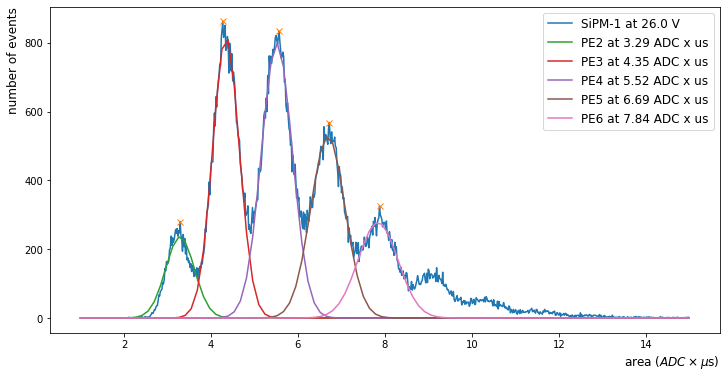

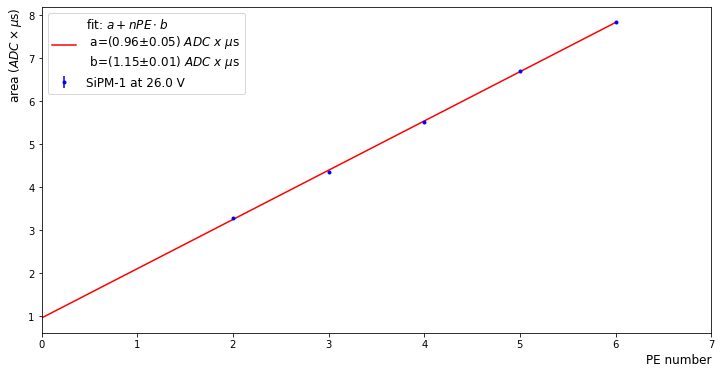

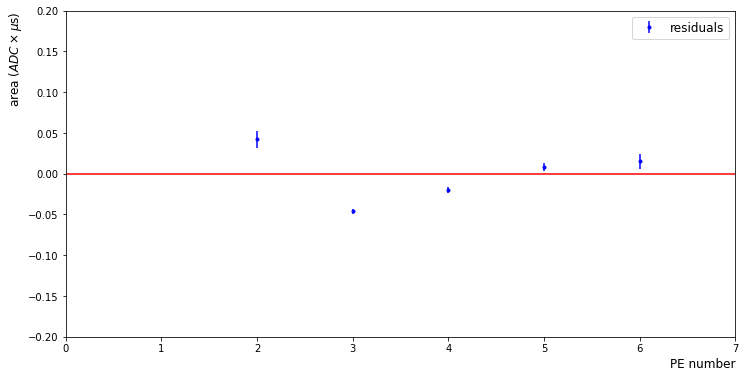

In [60]:
par = []
par_err = []
voltages = np.arange(26,29.6,0.5)
nsipm = 1
p, p_err = process_pe_spectrum(nsipm,voltages[0], 2, 10, 15, 800, 70, 7, 0.2)
par.append(p),par_err.append(p_err)

SiPM1 with 26.5  V, Number of values: 108262
PE 2 at 3.98 +/- 0.00 ADC x us
PE 3 at 5.60 +/- 0.00 ADC x us
PE 4 at 7.24 +/- 0.00 ADC x us
PE 5 at 8.87 +/- 0.01 ADC x us
PE 6 at 10.50 +/- 0.01 ADC x us


/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(None, None)

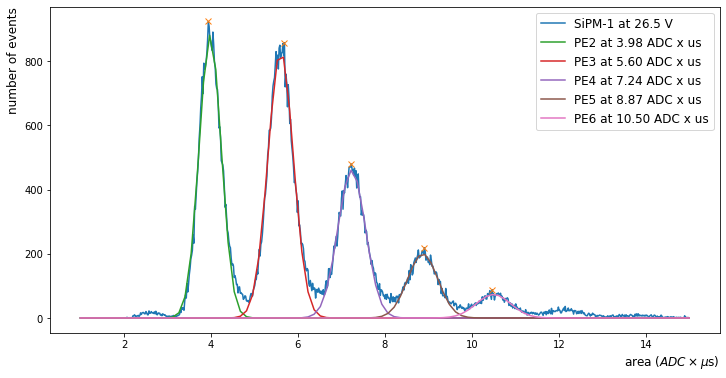

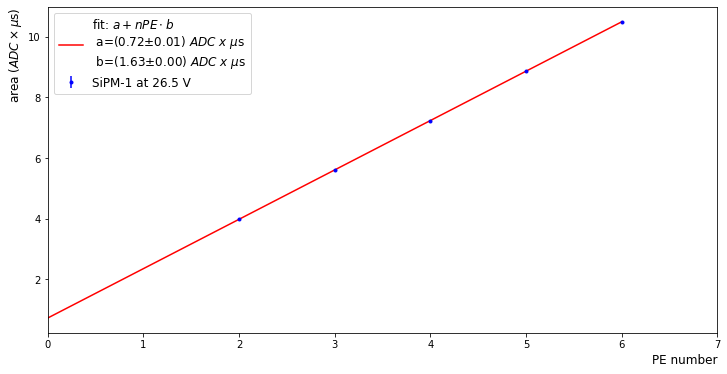

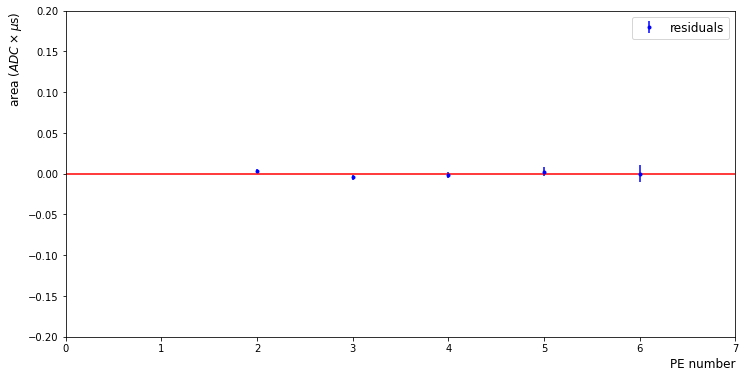

In [61]:
p, p_err = process_pe_spectrum(nsipm,voltages[1], 2, 10, 15, 800, 70, 7, 0.2)
par.append(p),par_err.append(p_err)

/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


SiPM1 with 27.0  V, Number of values: 232618
PE 2 at 4.64 +/- 0.00 ADC x us
PE 3 at 6.62 +/- 0.00 ADC x us
PE 4 at 8.63 +/- 0.01 ADC x us
PE 5 at 10.64 +/- 0.01 ADC x us
PE 6 at 12.65 +/- 0.01 ADC x us
PE 7 at 14.66 +/- 0.01 ADC x us
PE 8 at 16.64 +/- 0.01 ADC x us
PE 9 at 18.59 +/- 0.02 ADC x us
PE 10 at 20.47 +/- 0.06 ADC x us


(None, None)

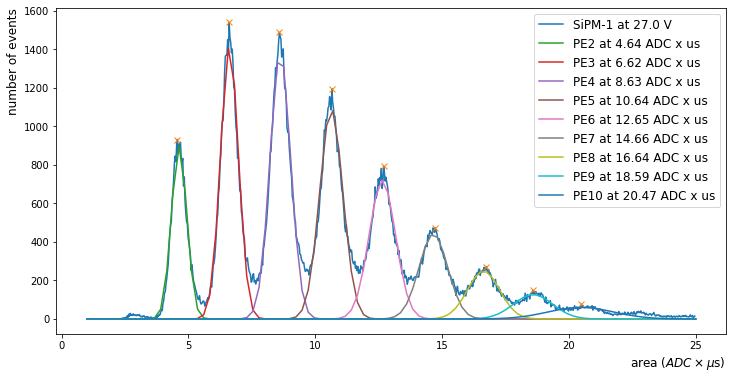

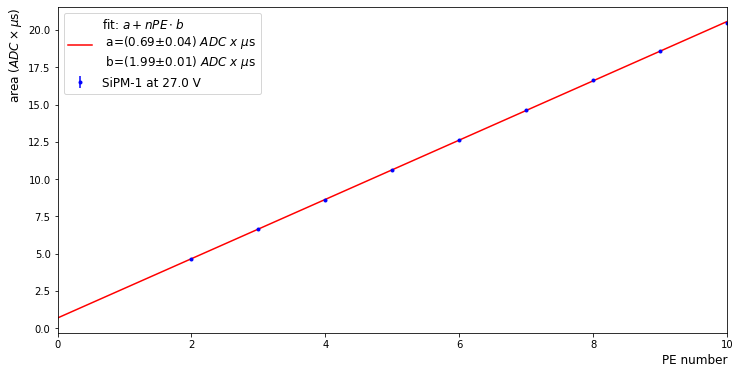

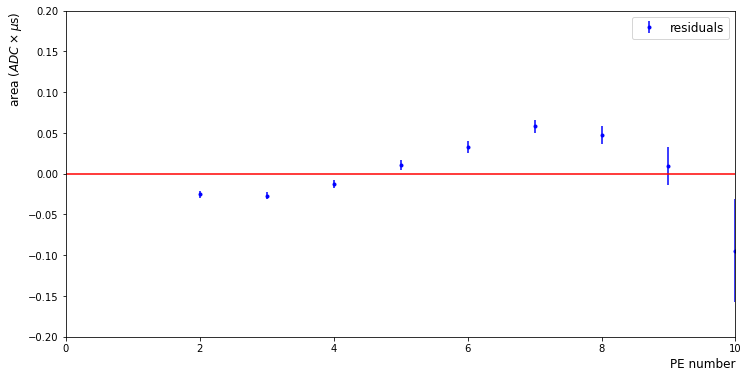

In [62]:
p, p_err = process_pe_spectrum(nsipm,voltages[2], 2, 10, 25, 800, 70, 10, 0.2)
par.append(p),par_err.append(p_err)

/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


SiPM1 with 27.5  V, Number of values: 261799
PE 1 at 3.25 +/- 0.01 ADC x us
PE 2 at 5.48 +/- 0.01 ADC x us
PE 3 at 7.91 +/- 0.01 ADC x us
PE 4 at 10.34 +/- 0.01 ADC x us
PE 5 at 12.77 +/- 0.01 ADC x us
PE 6 at 15.23 +/- 0.01 ADC x us
PE 7 at 17.66 +/- 0.01 ADC x us
PE 8 at 20.08 +/- 0.01 ADC x us
PE 9 at 22.53 +/- 0.01 ADC x us
PE 10 at 24.91 +/- 0.02 ADC x us


(None, None)

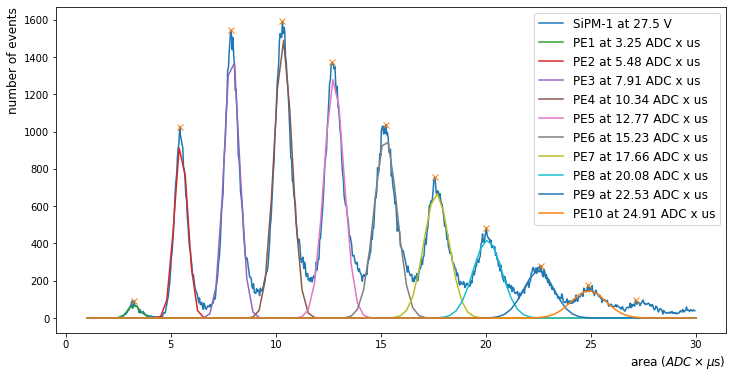

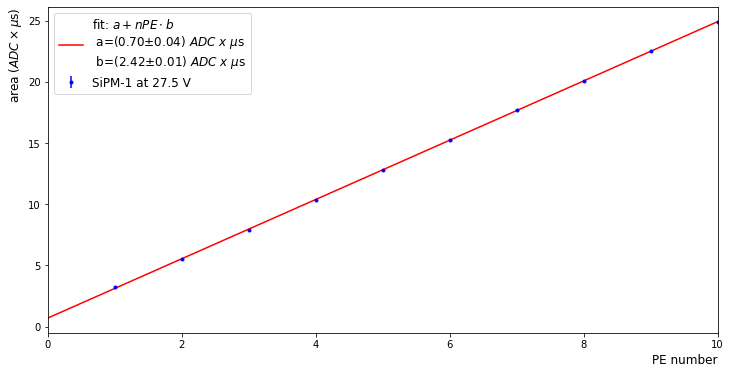

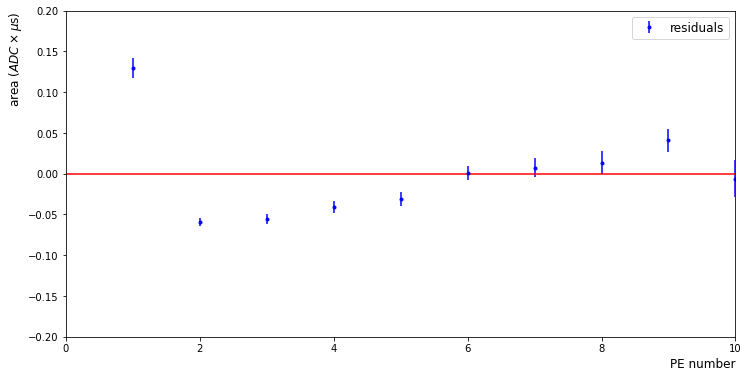

In [63]:
p, p_err = process_pe_spectrum(nsipm,voltages[3], 1, 10, 30, 800, 70, 10, 0.2)
par.append(p),par_err.append(p_err)

/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


SiPM1 with 28.0  V, Number of values: 255801
PE 1 at 3.51 +/- 0.01 ADC x us
PE 2 at 6.11 +/- 0.01 ADC x us
PE 3 at 8.90 +/- 0.01 ADC x us
PE 4 at 11.74 +/- 0.02 ADC x us
PE 5 at 14.57 +/- 0.02 ADC x us
PE 6 at 17.35 +/- 0.03 ADC x us
PE 7 at 20.12 +/- 0.04 ADC x us
PE 8 at 22.97 +/- 0.03 ADC x us
PE 9 at 25.63 +/- 0.07 ADC x us
PE 10 at 28.43 +/- 0.04 ADC x us
PE 11 at 31.30 +/- 0.05 ADC x us


(None, None)

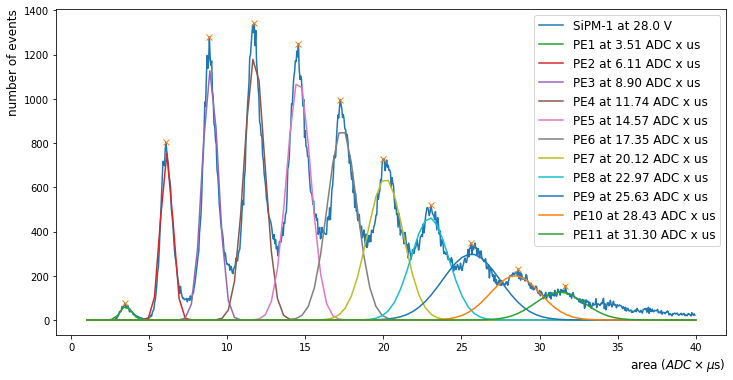

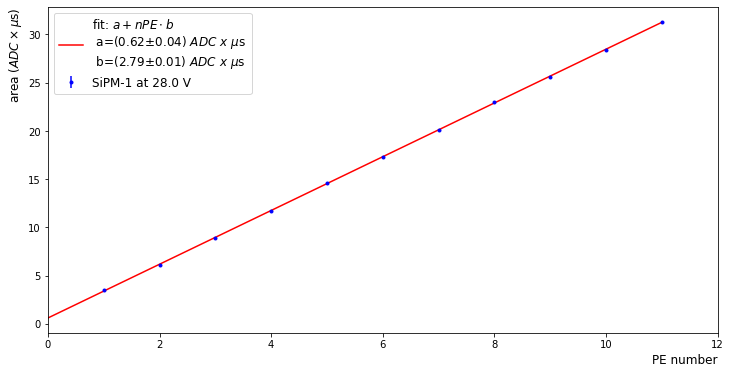

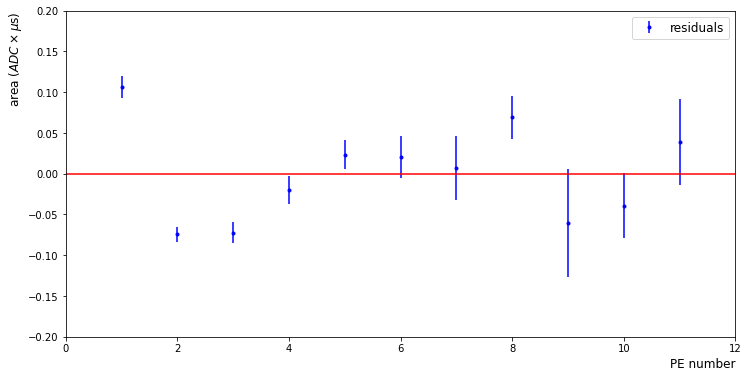

In [64]:
p, p_err = process_pe_spectrum(nsipm,voltages[4], 1, 12, 40, 800, 70, 12, 0.2)
par.append(p),par_err.append(p_err)

/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


SiPM1 with 28.5  V, Number of values: 259682
PE 1 at 3.86 +/- 0.01 ADC x us
PE 2 at 7.00 +/- 0.01 ADC x us
PE 3 at 10.26 +/- 0.01 ADC x us
PE 4 at 13.56 +/- 0.02 ADC x us
PE 5 at 16.84 +/- 0.02 ADC x us
PE 6 at 20.13 +/- 0.02 ADC x us
PE 7 at 23.44 +/- 0.02 ADC x us
PE 8 at 26.71 +/- 0.02 ADC x us
PE 9 at 29.89 +/- 0.03 ADC x us


(None, None)

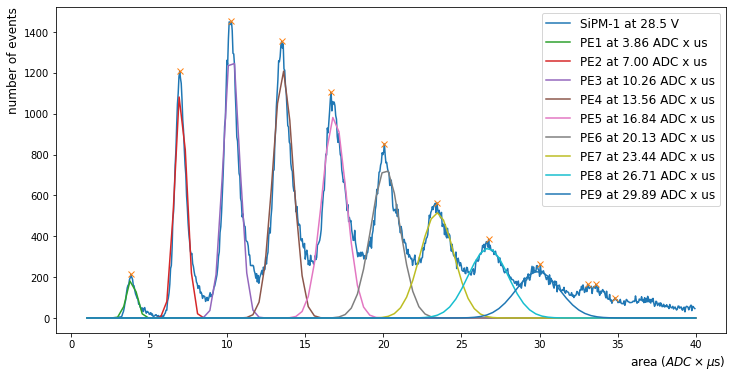

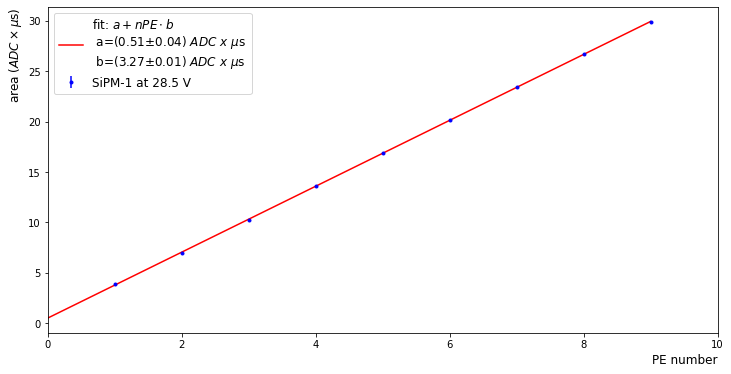

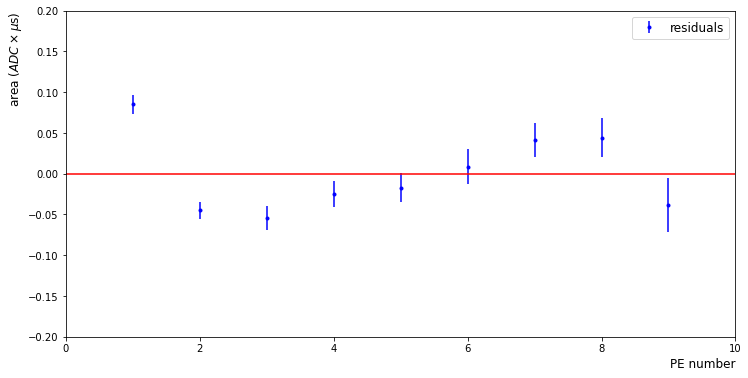

In [65]:
p, p_err = process_pe_spectrum(nsipm,voltages[5], 1, 9, 40, 800, 70, 10, 0.2)
par.append(p),par_err.append(p_err)

/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


SiPM1 with 29.0  V, Number of values: 264889
PE 1 at 4.19 +/- 0.01 ADC x us
PE 2 at 7.72 +/- 0.01 ADC x us
PE 3 at 11.39 +/- 0.02 ADC x us
PE 4 at 15.06 +/- 0.02 ADC x us
PE 5 at 18.75 +/- 0.03 ADC x us
PE 6 at 22.48 +/- 0.03 ADC x us
PE 7 at 26.11 +/- 0.04 ADC x us
PE 8 at 29.76 +/- 0.03 ADC x us
PE 9 at 33.27 +/- 0.08 ADC x us
PE 10 at 37.07 +/- 0.04 ADC x us
PE 11 at 40.49 +/- 0.07 ADC x us


(None, None)

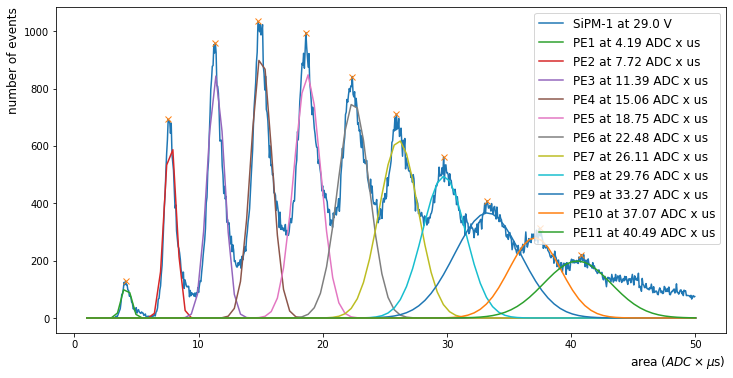

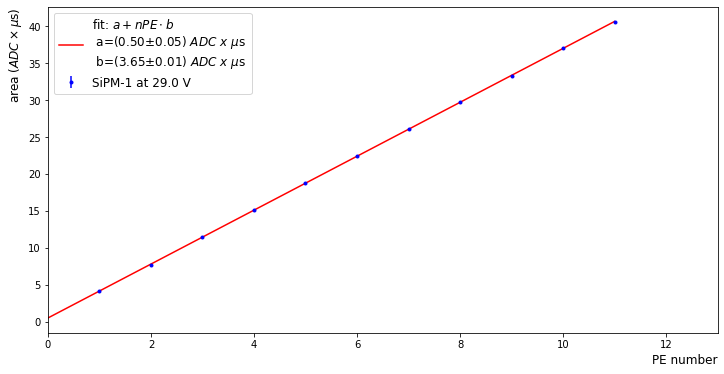

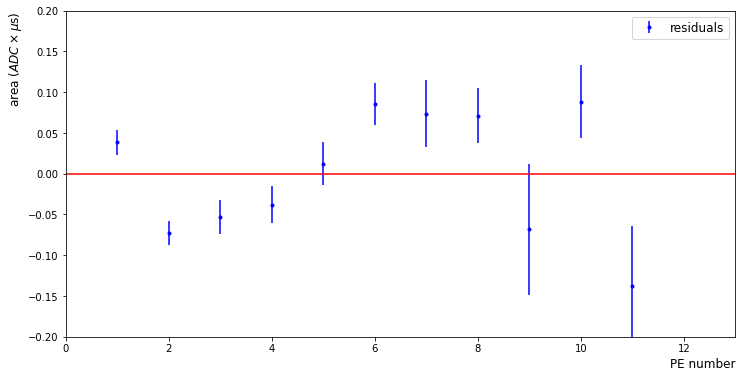

In [66]:
p, p_err = process_pe_spectrum(nsipm,voltages[6], 1, 12, 50, 800, 70, 13, 0.2)
par.append(p),par_err.append(p_err)

/home/valerio/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/valerio/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


SiPM1 with 29.5  V, Number of values: 256814
PE 1 at 4.58 +/- 0.02 ADC x us
PE 2 at 8.60 +/- 0.02 ADC x us
PE 3 at 12.72 +/- 0.02 ADC x us
PE 4 at 16.87 +/- 0.02 ADC x us
PE 5 at 21.02 +/- 0.03 ADC x us
PE 6 at 25.15 +/- 0.04 ADC x us
PE 7 at 29.27 +/- 0.04 ADC x us
PE 8 at 33.43 +/- 0.04 ADC x us


(None, None)

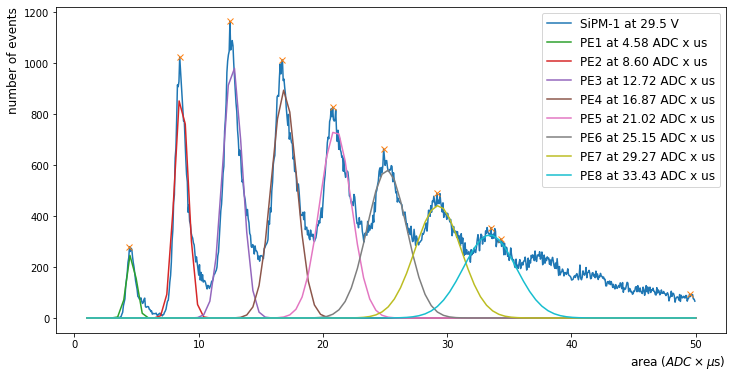

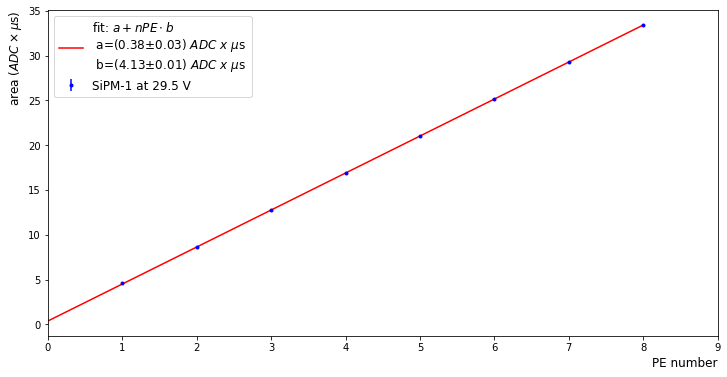

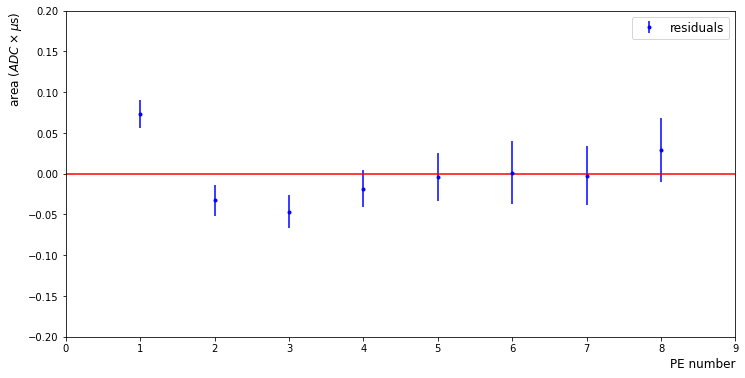

In [67]:
p, p_err = process_pe_spectrum(nsipm,voltages[7], 1, 8, 50, 800, 70, 9, 0.2)
par.append(p),par_err.append(p_err)

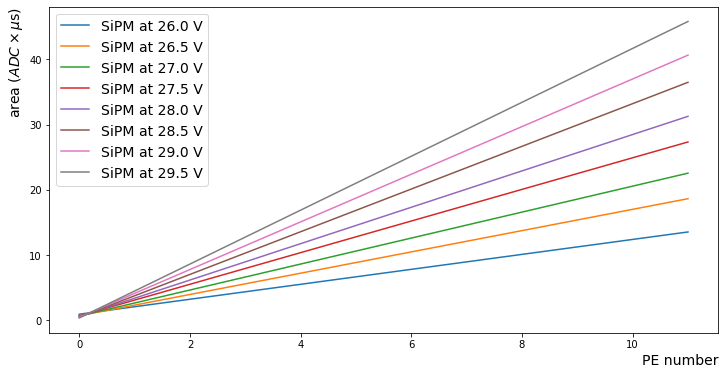

In [72]:
plt.figure(figsize=(12,6))
x = range(0,12)
for i in range(len(par)):
    plt.plot(x,psu.retta(x,par[i][0],par[i][1]),label=f'SiPM at {voltages[i]} V')
plt.ylabel(r'area ($ADC\times \mu$s)',ha='right',y=1,fontsize=14)
plt.xlabel('PE number',ha='right',x=1,size=40,fontsize=14)
plt.legend(fontsize=14)